# Exploring and Preprocessing Air Quality Data
### Dataset
Air Quality Dataset from UC Irvine Machine Learning Repository

Link: https://archive.ics.uci.edu/dataset/360/air+quality

This time-series dataset comprises hourly records from five metal oxide chemical sensors monitoring air quality in an Italian city over one year (March 2004 to February 2005). It captures hourly average concentrations of CO, hydrocarbons, NOx, NO2(Nitrogen Dioxide) and O3. 

These sequence of data collected over the period of one year is analyzed and preprocessed in this notebook. Also, the final processed version of data is saved in updated csv/excel file.

### 1. Import Libraries

In [1]:
import os
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Utilities import parse_date_time, handle_missing_values
from Utilities import generate_line_plots, decompose_seasonality_charts
from Utilities import check_uniformity, normalize_or_scale_data, detect_outliers_iqr, handle_outliers
from Utilities import correlation_analysis, top_correlated_features, log_transform, sqrt_transformation

### 2. Load Data

In [2]:
df = pd.read_excel('../Data/AirQualityUCI.xlsx')

In [3]:
df.shape

(9357, 15)

In [4]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [5]:
df.dtypes

Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                  int64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object

The data types for all numeric values are correct. However, the 'Time' column should be in timestamp format. We will begin our exploratory data analysis and data preprocessing with this adjustment.

##### Data:

CO(GT), NMHC(GT), C6H6(GT), NOx(GT) and NO2(GT) are ground truth values of these gases in air.

PT08.S1(CO), PT08.S2(NMHC), PT08.S3(NOx), PT08.S4(NO2) and PT08.S5(O3) are sensored responses values.

T is Temperature of the air

RH is Relative Humidity in the air

AH is Absolute Humidity in the air

In our next steps, we will analyze, clean and engineer these data.

### 3. EDA and Data Preprocessing
3.1. Cleaning up the data

        3.1.1. DateTime Parsing
        3.1.2. Handlie Missing Values
   
3.2. Analyze Trend and Seasonality in data

3.3. Check Data Uniformity

3.4. Normalization/Scaling

3.5. Outlier Detection
   
       3.5.1. Detect outliers
       3.5.2. Log transformation
3.6. Feature Relationships
   
       3.6.1. Correlation analysis
       3.6.2. Top correlated features
3.7. Feature Engineering

### 3.1. Cleaning up the data
#### 3.1.1. DateTime Parsing
Ensure timestamp format is correct and Convert Date and Time columns into single datetime field

In [6]:
df = parse_date_time(df, 2)

#### 3.1.2. Handling Missing Values
Examine the dataset for any missing or NaN values, and address them by either removing the records or substituting the values. In this dataset, all NaN values have already been replaced with -200.

In [7]:
df = handle_missing_values(df)

No missing values
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


### 3.2. Analyze Trend and Seasonality in data
Decomposing time-series to separate trend, seasonality and residuals

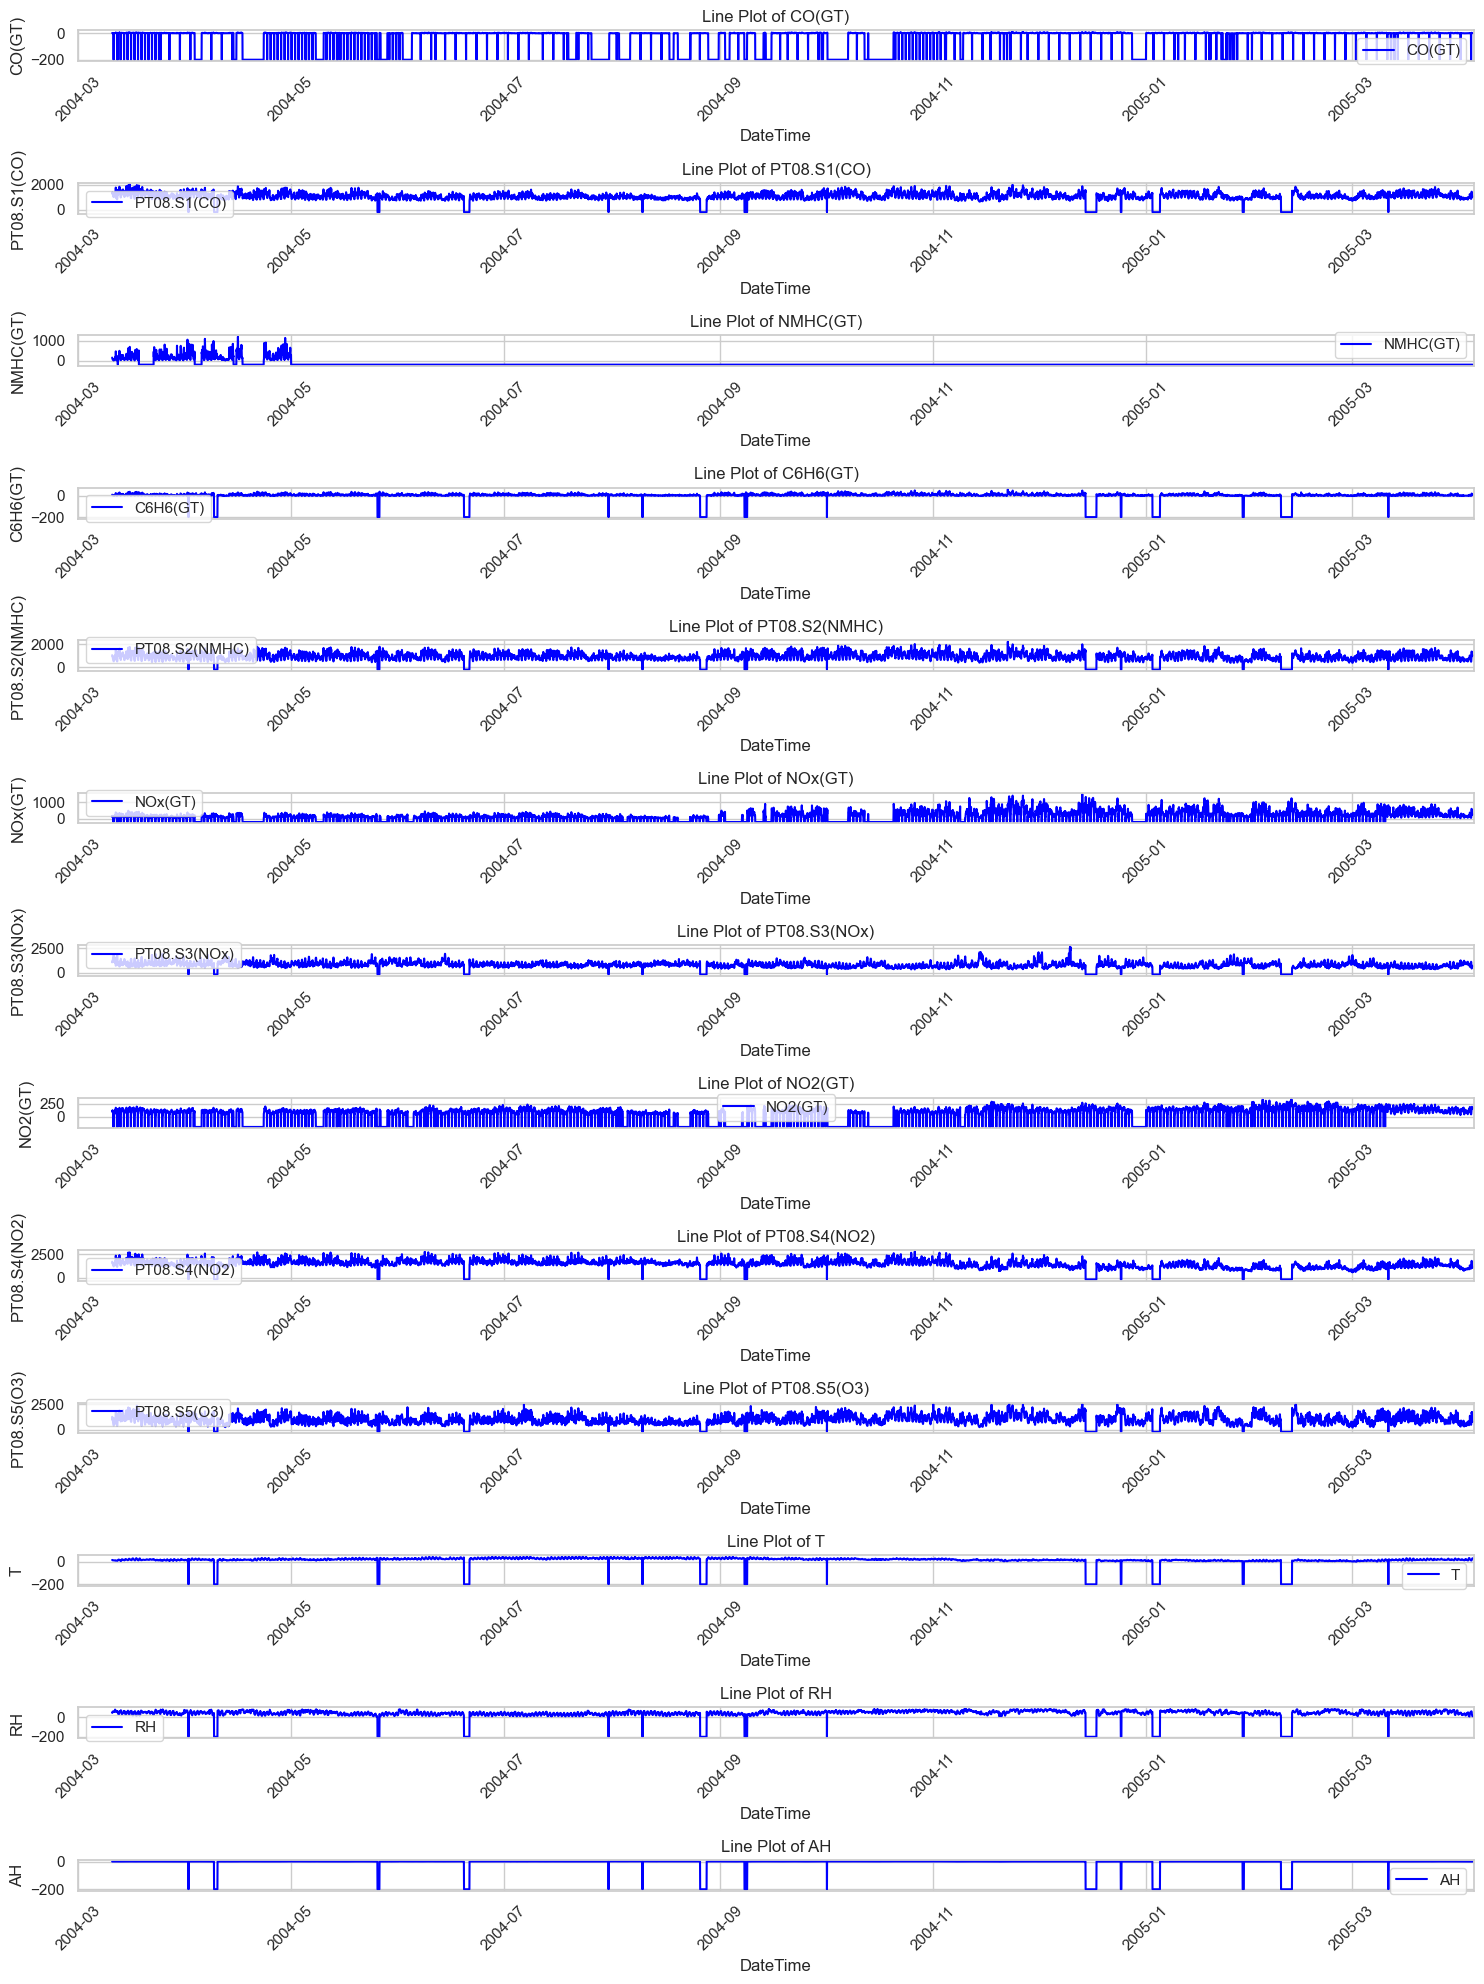

In [8]:
# numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
generate_line_plots(df, df.columns)

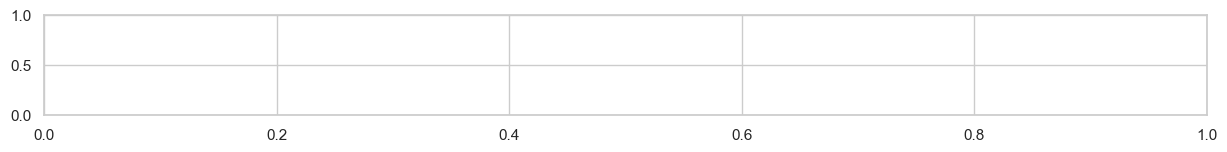

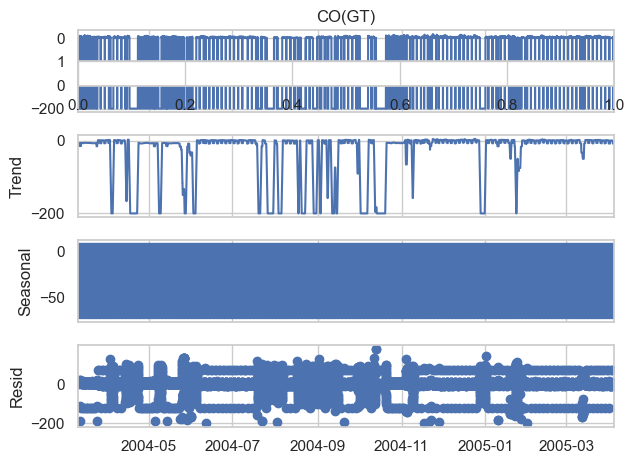

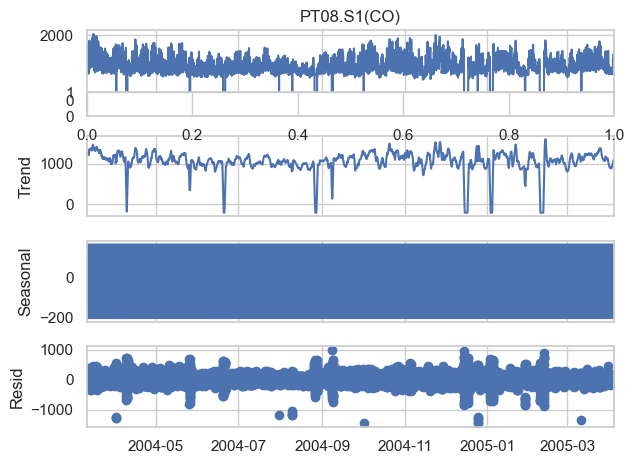

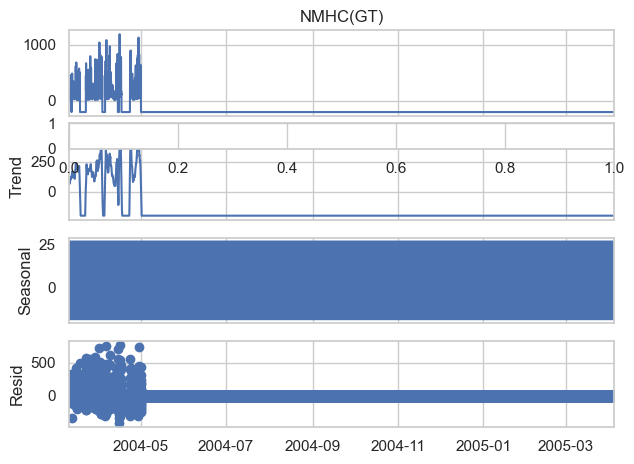

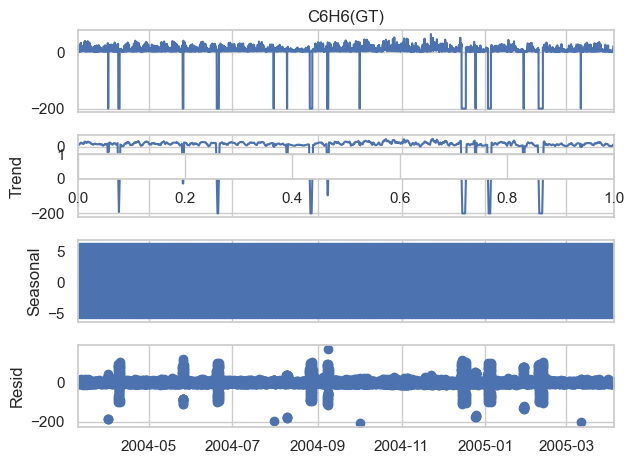

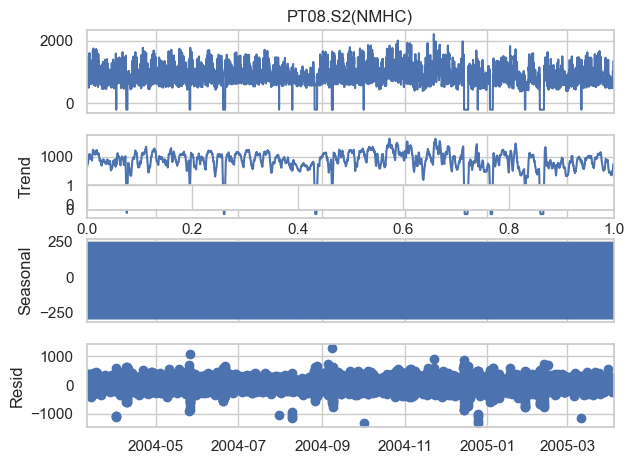

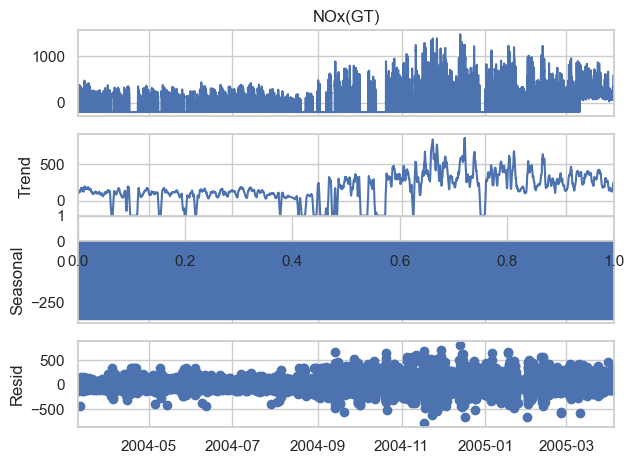

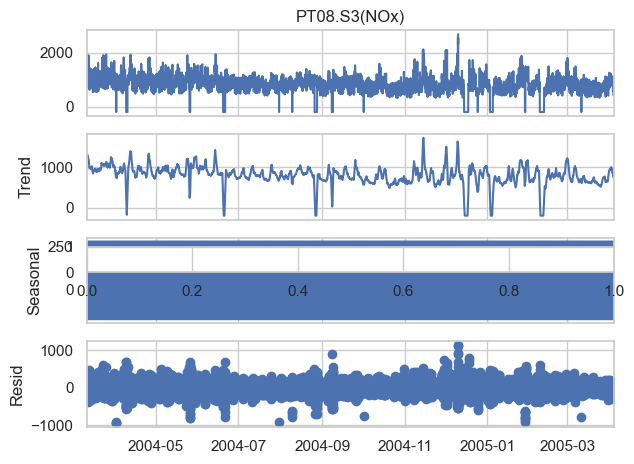

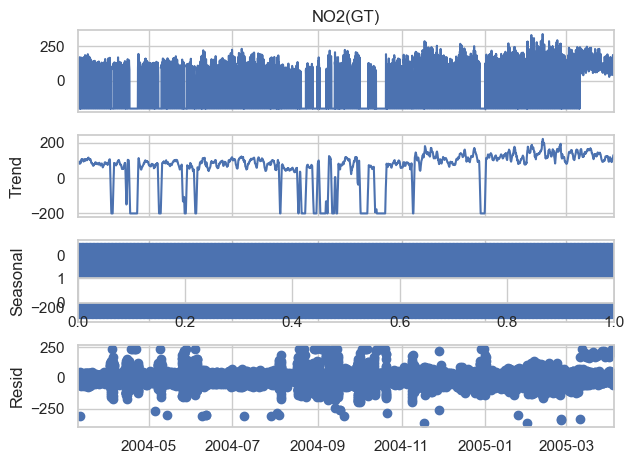

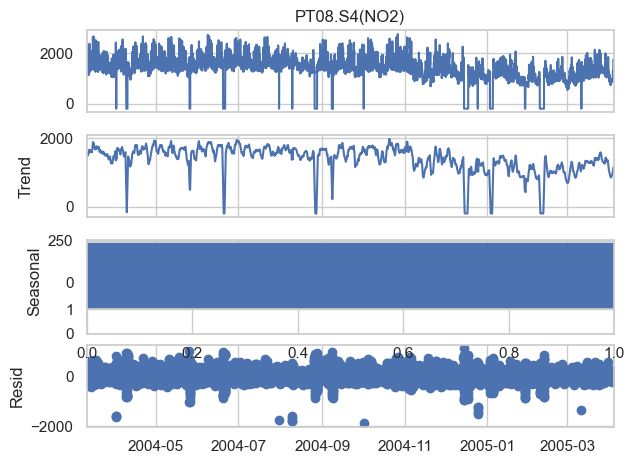

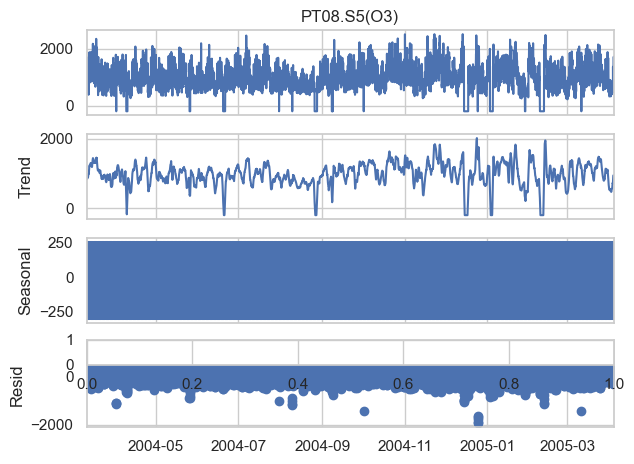

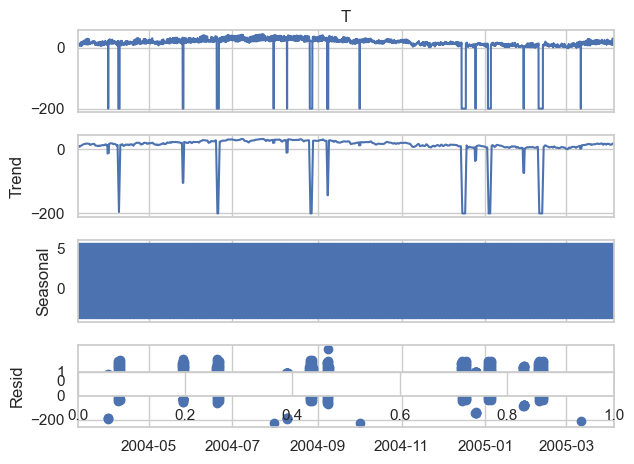

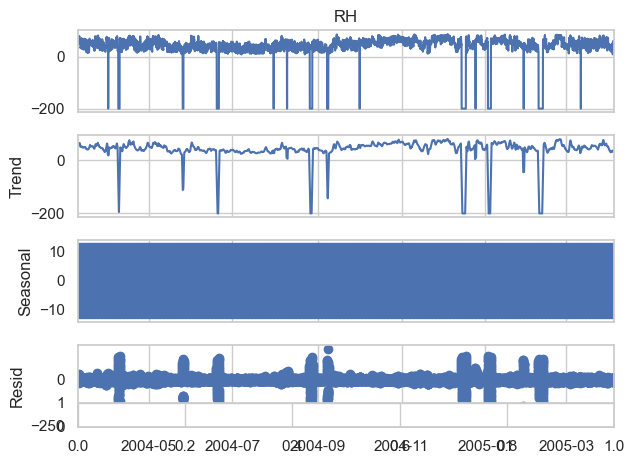

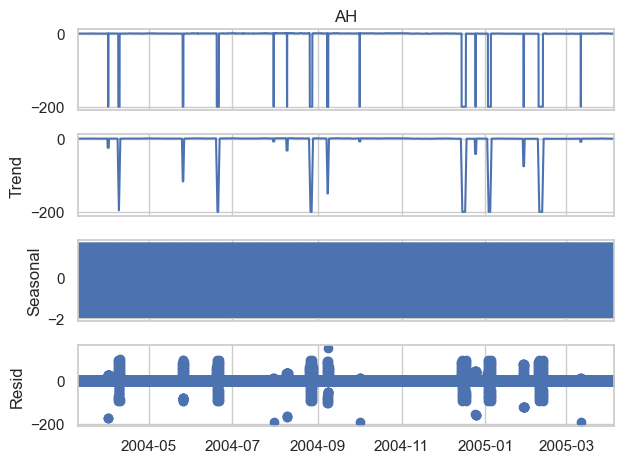

In [9]:
decompose_seasonality_charts(df, df.columns)

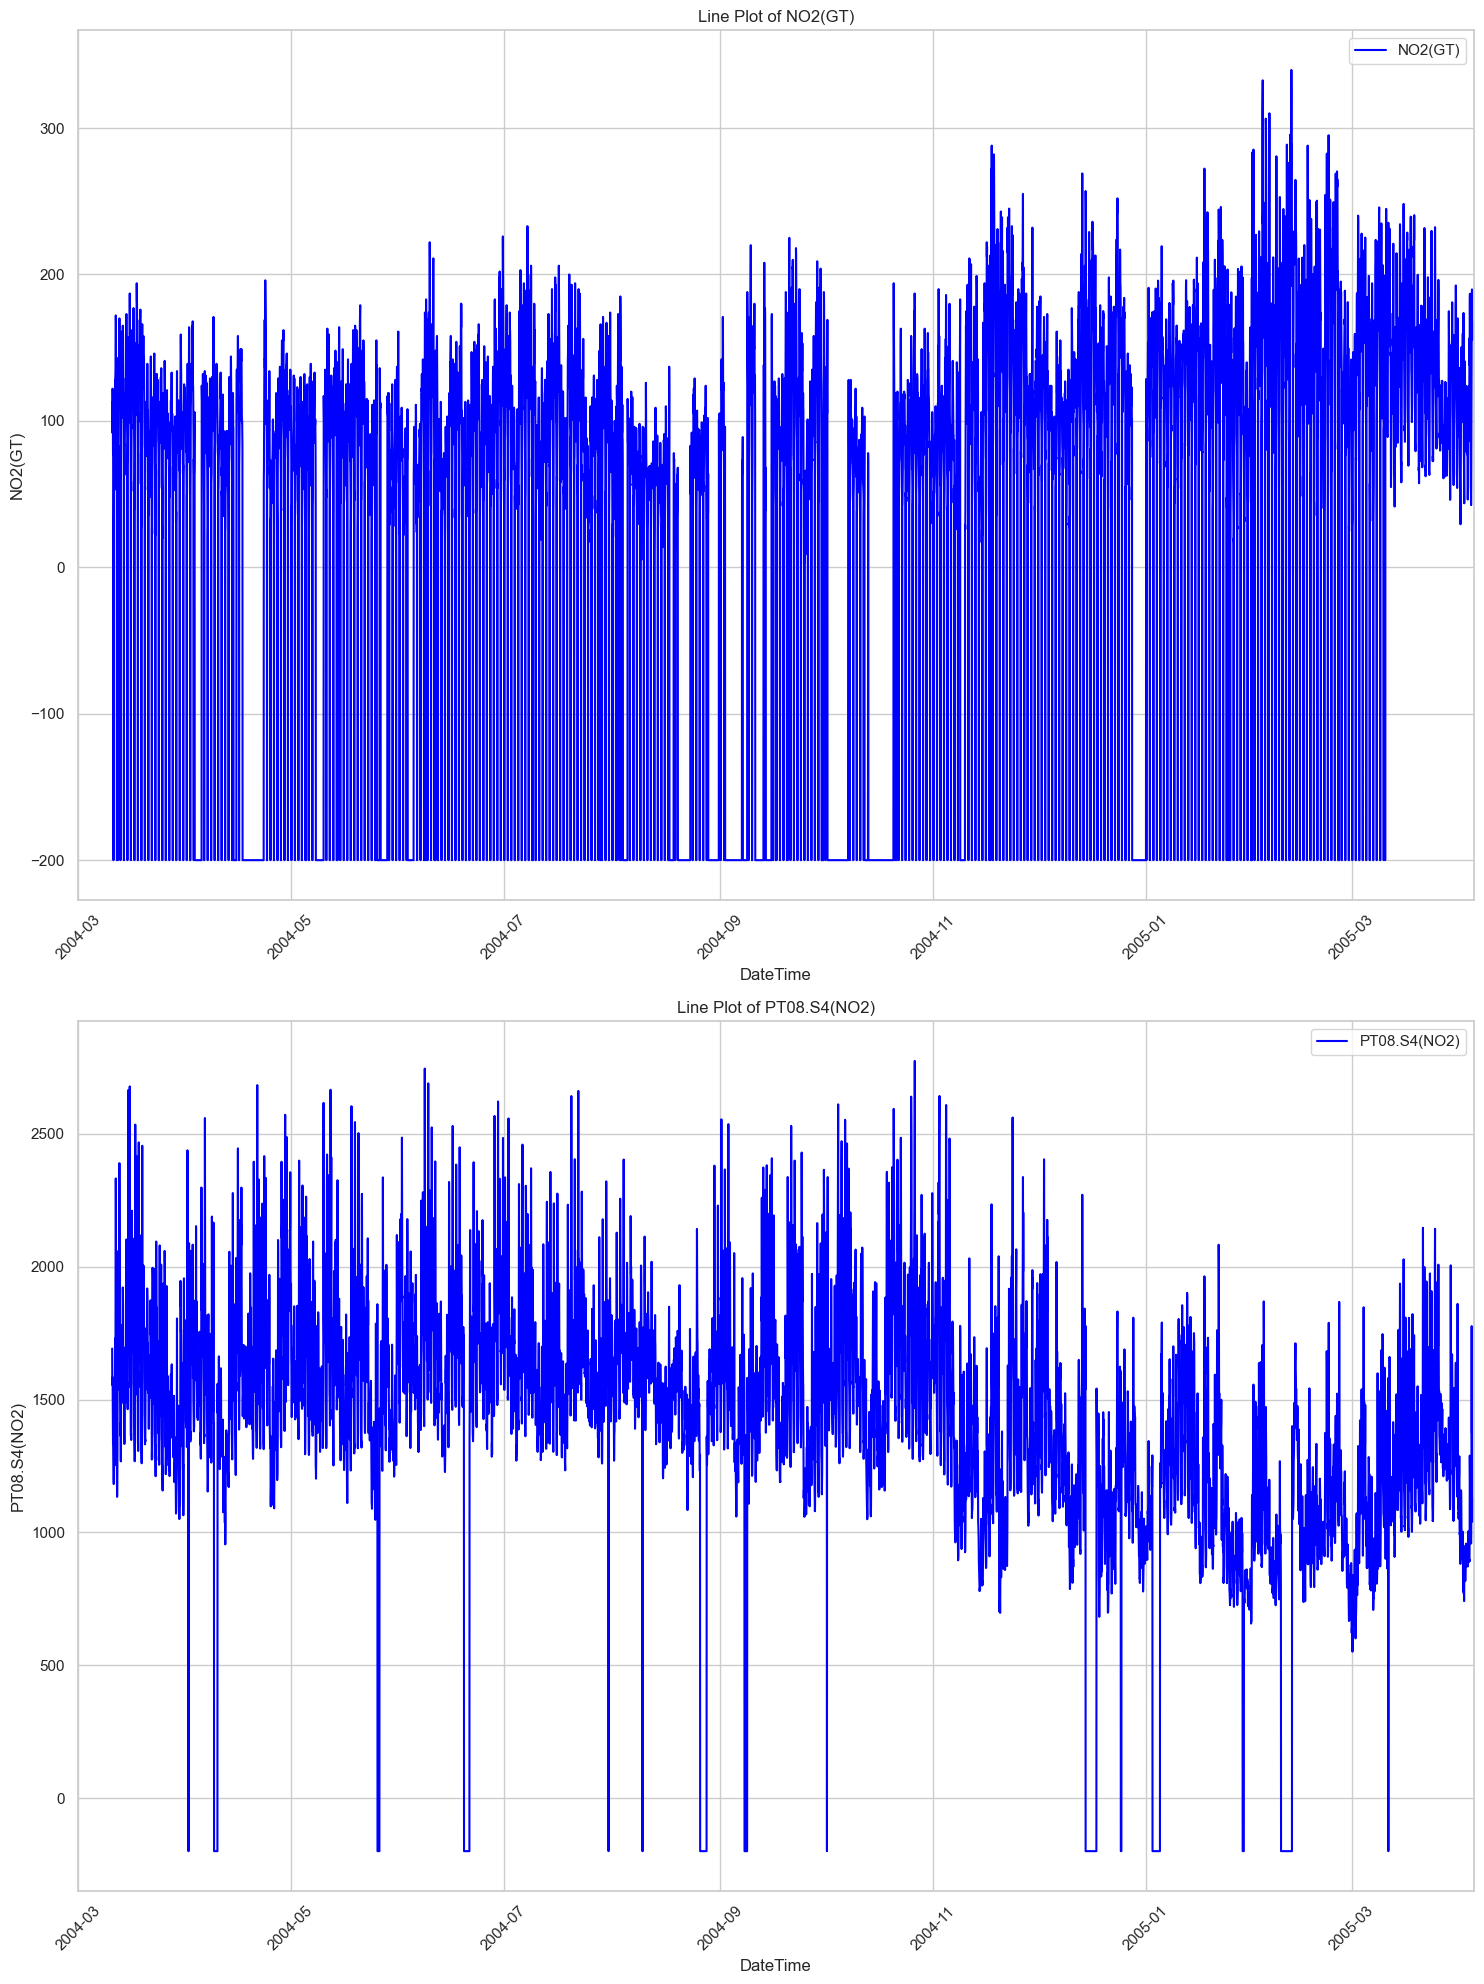

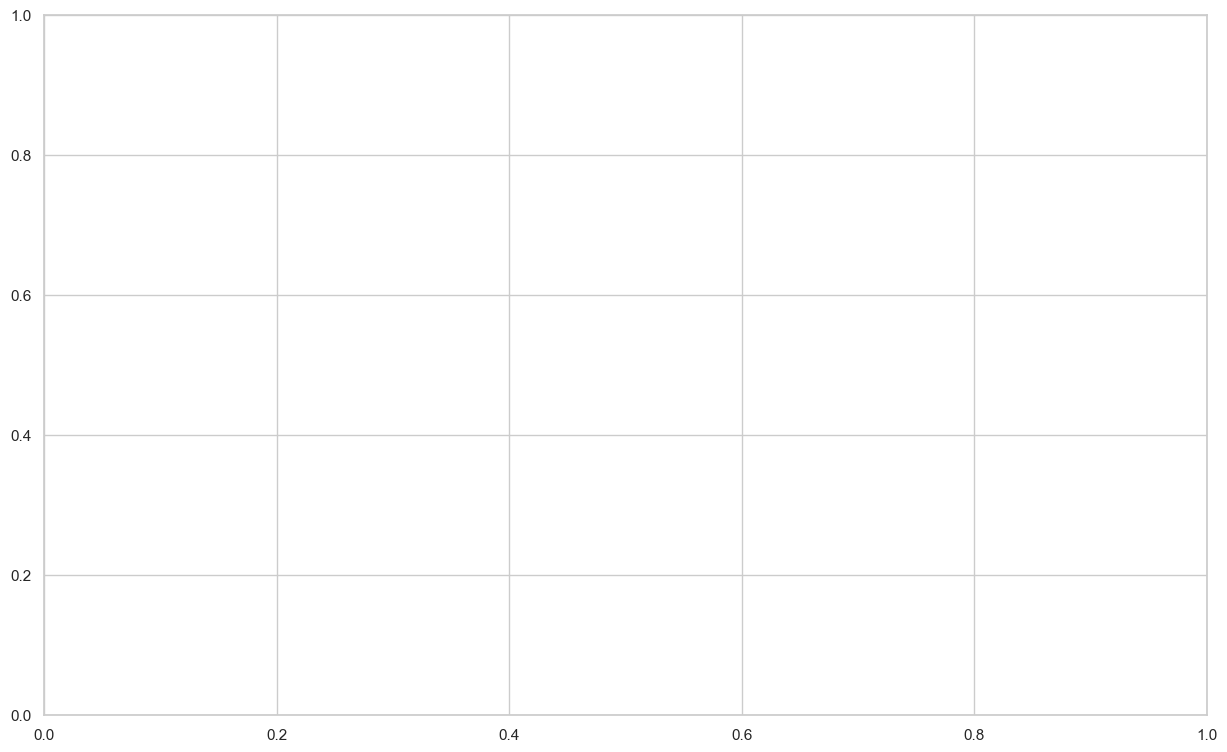

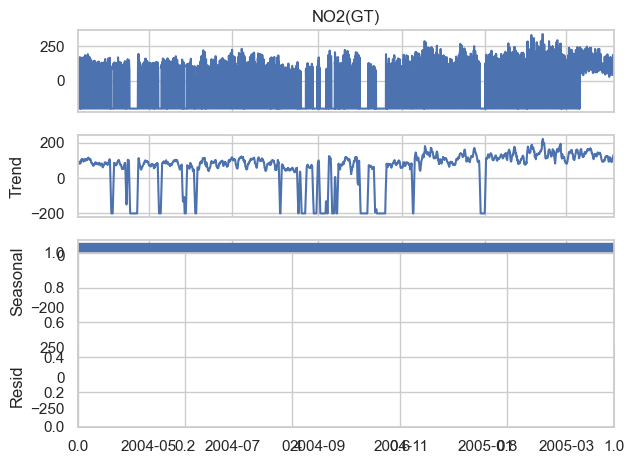

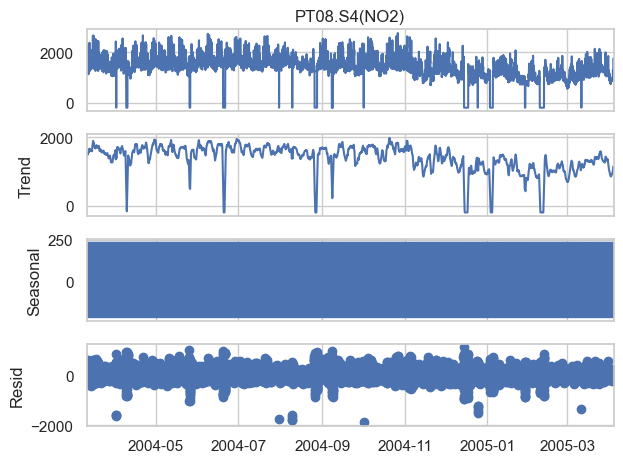

In [10]:
# Since our focus i s on NO2 concentration we following are NO2 plots
generate_line_plots(df, ['NO2(GT)', 'PT08.S4(NO2)'])
decompose_seasonality_charts(df, ['NO2(GT)', 'PT08.S4(NO2)'])

From the trend, seasonality, and residual plots above:

Each variable shows an overall increasing or decreasing trend over time, with occasional peaks that represent residual outliers. Additionally, they exhibit a consistent seasonal pattern throughout the year.

### 3.3. Check Data Uniformity
With the help of Komogorov-Smirnov test we will check whether our data is uniform

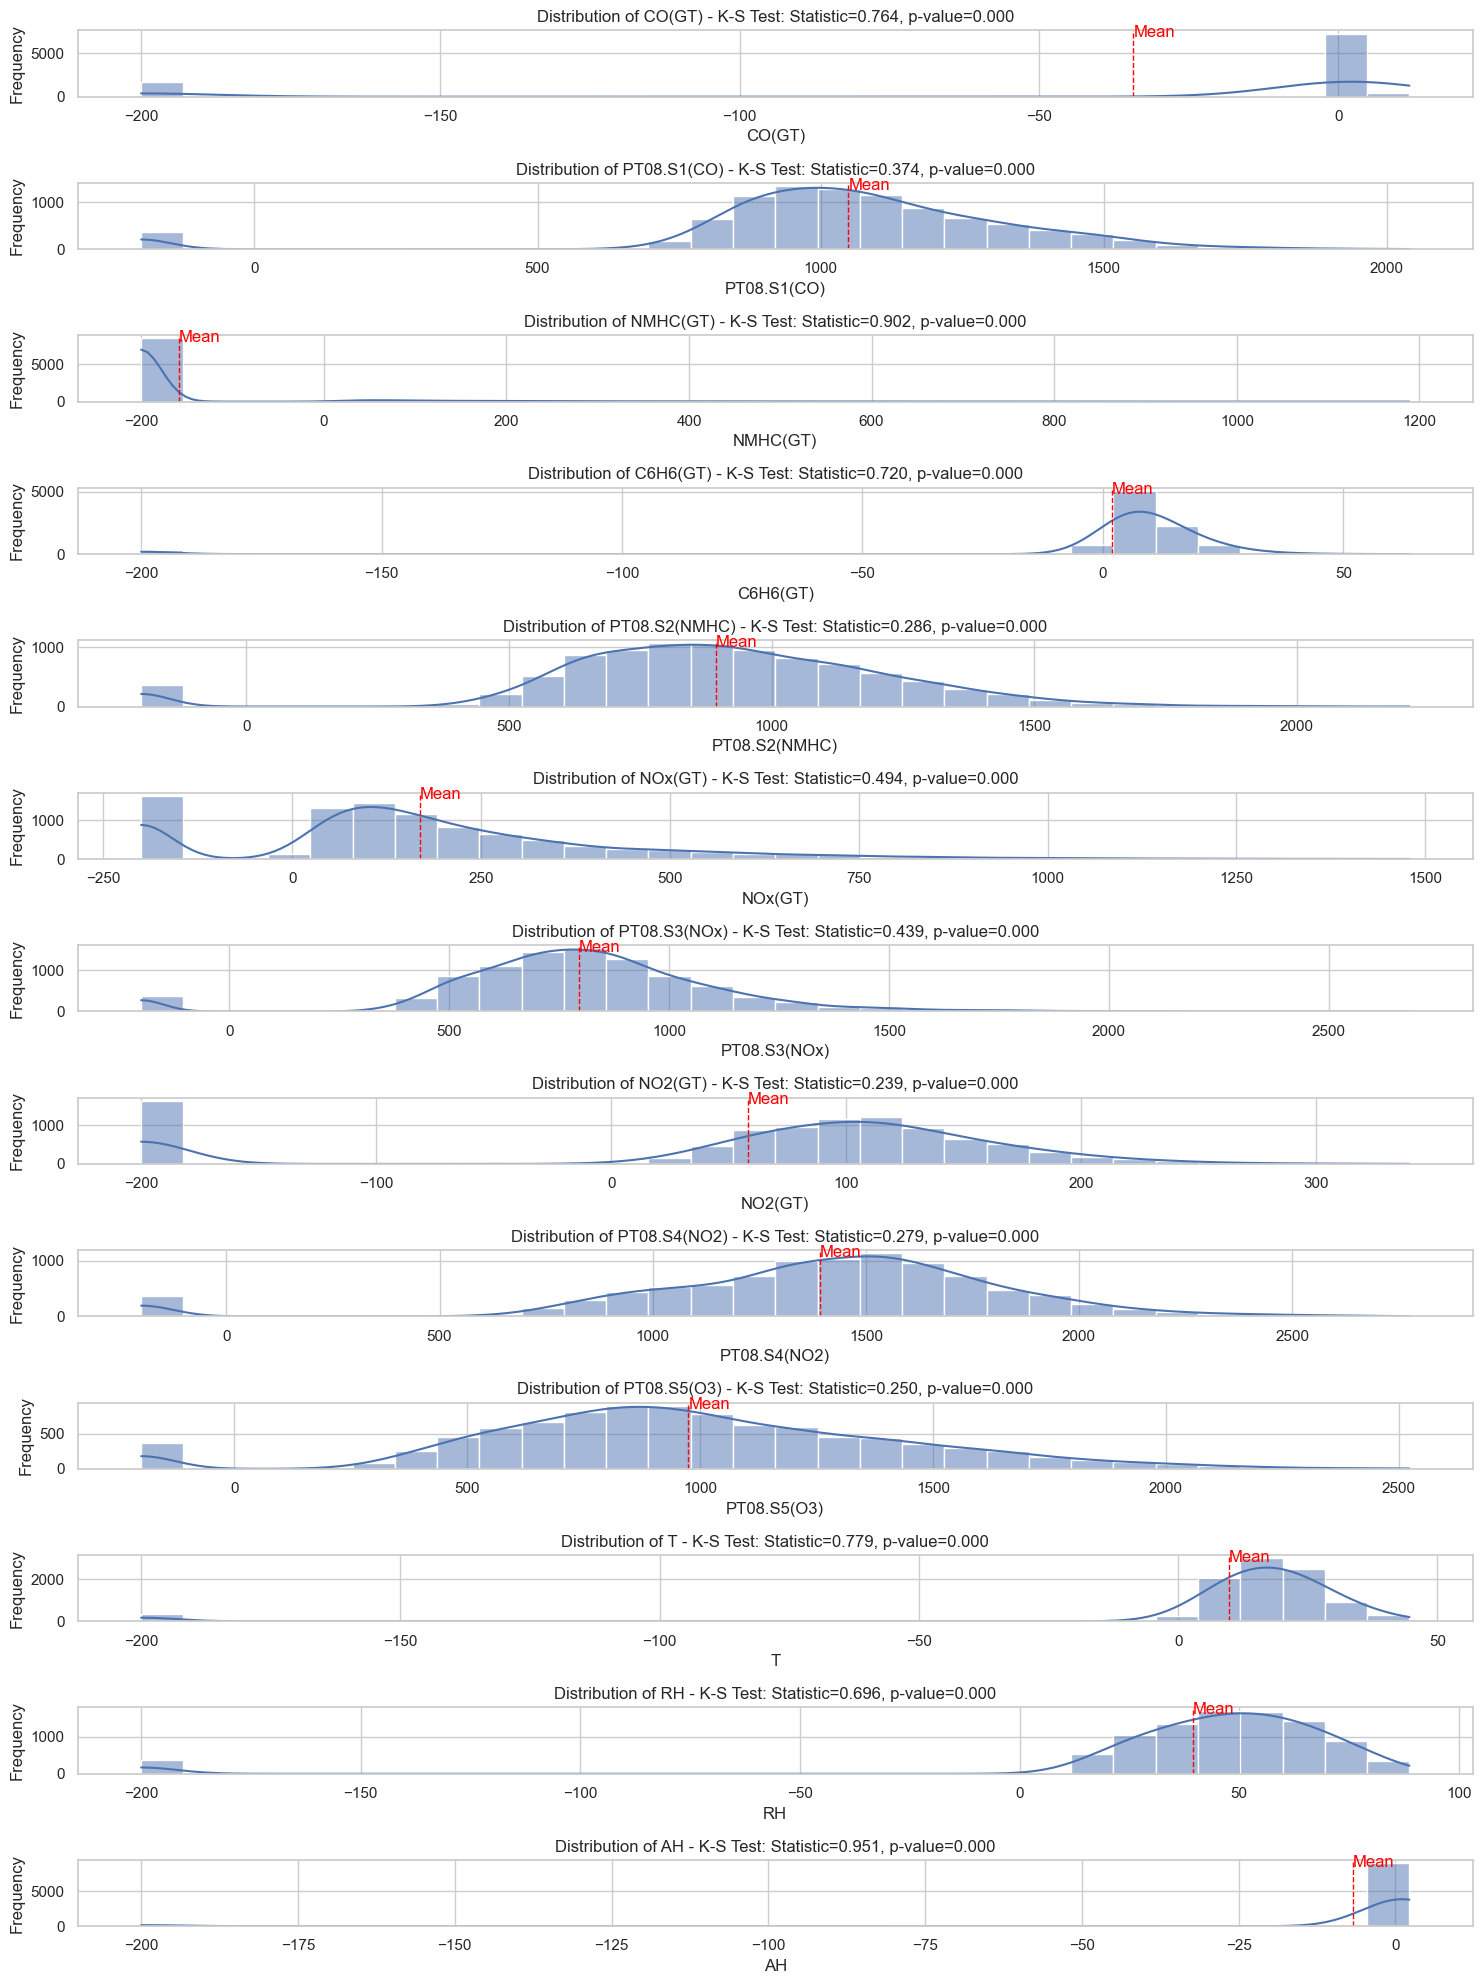

['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH'] are Non-Uniform


In [11]:
check_uniformity(df, df.columns)

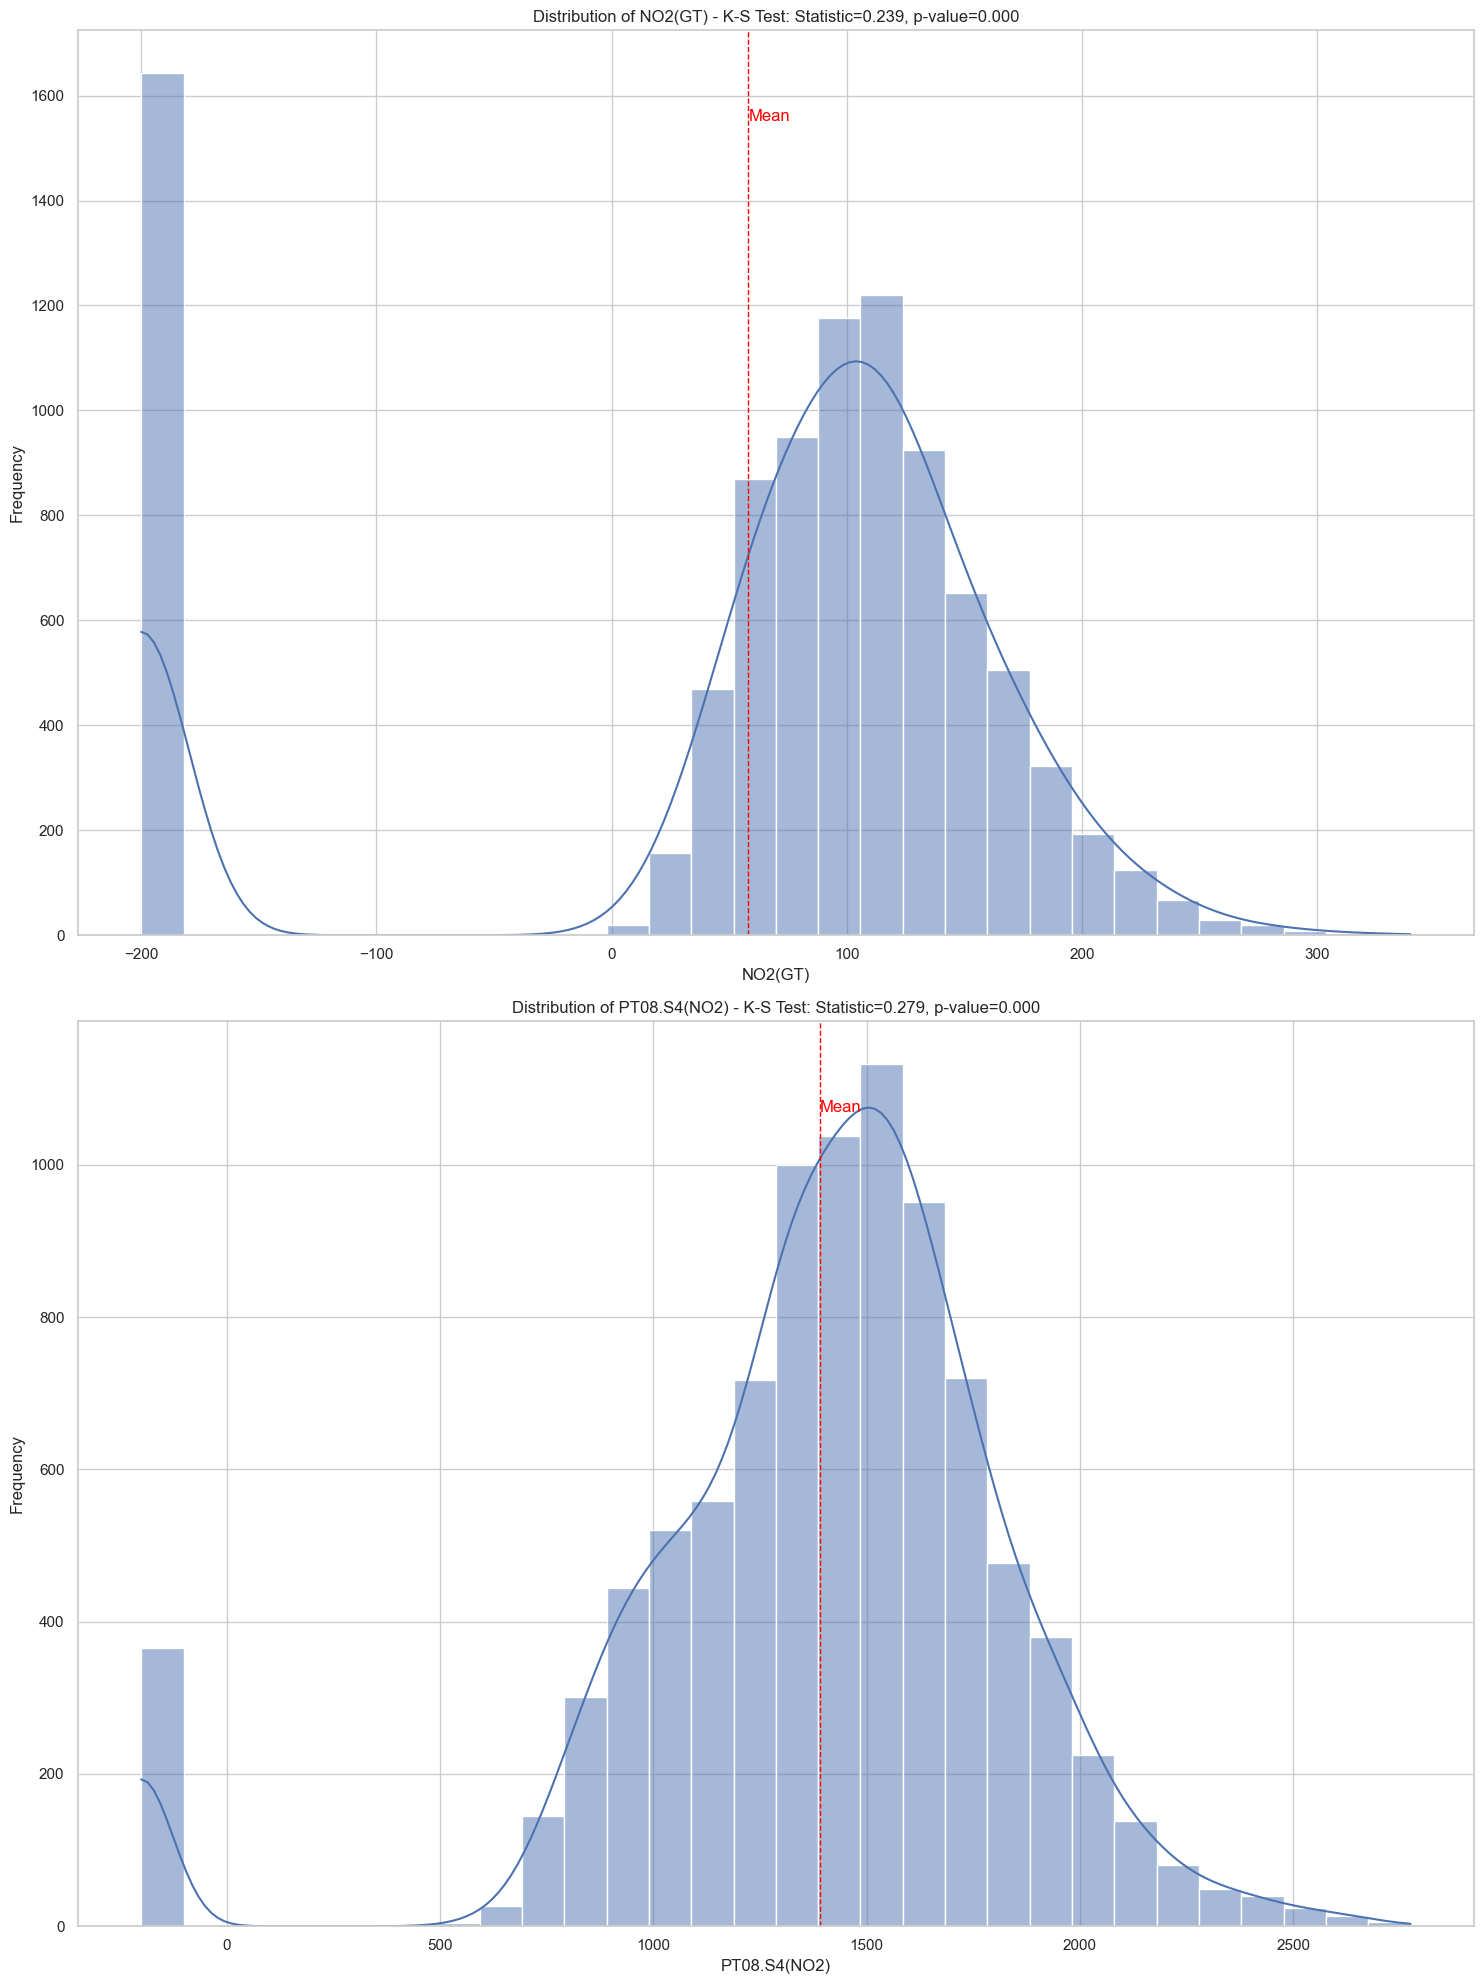

['NO2(GT)', 'PT08.S4(NO2)'] are Non-Uniform


In [12]:
check_uniformity(df, ['NO2(GT)', 'PT08.S4(NO2)'])

The KS test indicates that our data is non-uniform, so we need to normalize and transform it before feeding it into the model.

### 3.4. Normalization/Scaling

In [13]:
def replace_negative_values_with_nan(df):
    """
    Function to replace -200 values with nan, as it can affect the uniformity of the data
    Args:
        df(pandas.DataFrame): Dataframe of the loaded data
    Returns:
        df(pandas.DataFrame): updated dataframe
    """
    df.replace(-200, np.nan, inplace=True)
    return df

df = replace_negative_values_with_nan(df)
df = handle_missing_values(df)
# check_uniformity(df, numerical_columns)

Handling missing values with median values
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64


In [14]:
df = normalize_or_scale_data(df)

### 3.5. Outlier Detection
#### 3.5.1. Detect outliers
Using Inter Quartile Range(IQR) as it is not affected by extreme values and is best for non-uniform/non-gaussian data

In [15]:
df = handle_outliers(df)

#### 3.5.2. Log transformation
Feature Engineering target variable by performing log transformation

In [16]:
df = log_transform(df, 'PT08.S4(NO2)', 9)

### 3.6. Feature Relationships
#### 3.6.1. Correlation Analysis

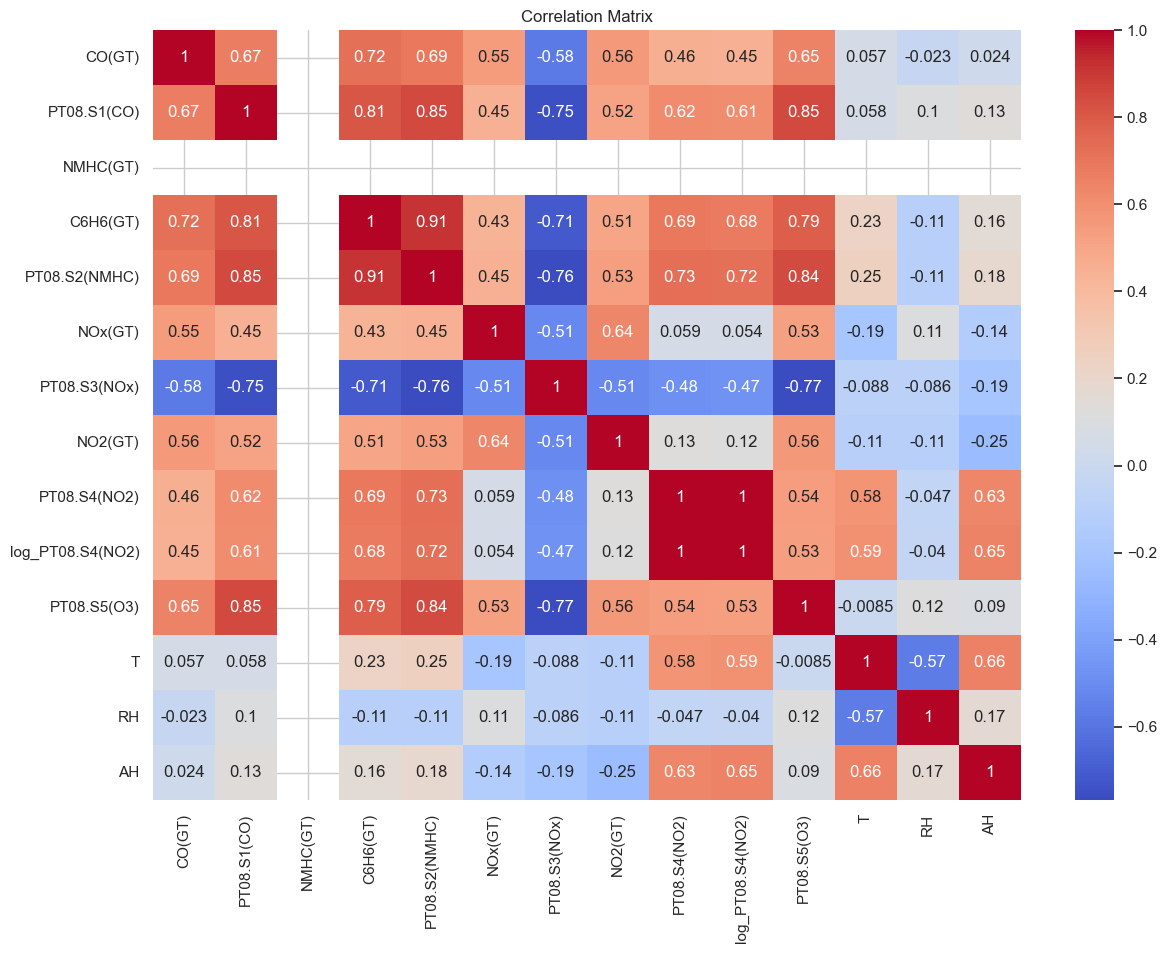

In [17]:
correlation_matrix = correlation_analysis(df)

#### 3.6.2. Top Correlated Features
Selecting top correlated features with the target variable

Top features correlated with PT08.S4(NO2):
PT08.S4(NO2)        1.000000
log_PT08.S4(NO2)    0.997745
PT08.S2(NMHC)       0.727533
C6H6(GT)            0.689188
AH                  0.634876
Name: PT08.S4(NO2), dtype: float64


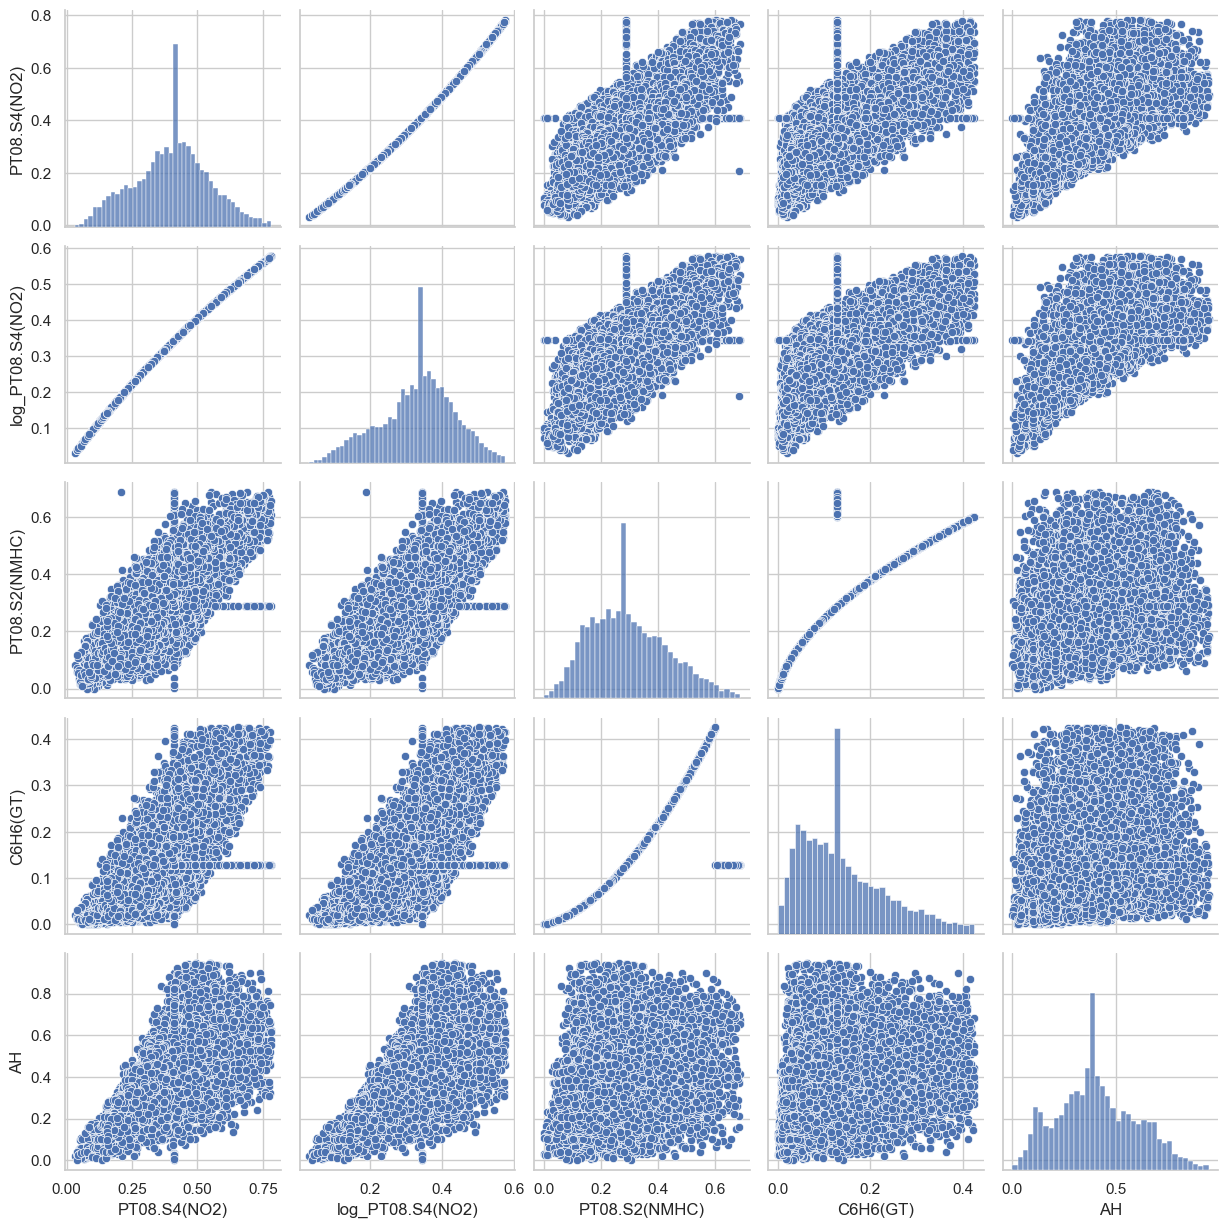

In [18]:
top_correlated_features(df, correlation_matrix, 'PT08.S4(NO2)', 5)

### 3.7. Additional Feature Engineering
Feature Engineering variables by performing transformations
Here, transforming target variable along with it's top correlated features which are useful for our forecasting model

In [19]:
df = log_transform(df, 'PT08.S2(NMHC)', 5)
df = log_transform(df, 'C6H6(GT)', 4)

#### 3.7.1. Power Transformations

In [20]:
df = sqrt_transformation(df, 'PT08.S4(NO2)', 12)
df = sqrt_transformation(df, 'PT08.S2(NMHC)', 7)
df = sqrt_transformation(df, 'C6H6(GT)', 5)

In [21]:
df.to_excel('../Data/Updated_AirQualityUCI.xlsx')
df.to_csv('../Data/Updated_AirQualityUCI.csv')

Summary:
1. The data is non-uniform, non-Gaussian, and skewed, which adds complexity.
2. We addressed skewness and distribution issues by normalizing and transforming the data.
3. Identified C6H6(GT) and PT08.S2(NMHC) as top predictors for PT08.S4(NO2) and will use them in our forecasting model.
Despite stationarity and skewness challenges, our preprocessing effectively prepared the data for accurate model evaluation and forecasting.